## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env import TicTacToe #- import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

env = TicTacToe()

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [5]:
#state = [1,3,8,'','','','','',4]
#s2 = Q_state(env.state)
#print(s2)
#s1 = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,]
#chk = add_to_dict(s1)
#print(chk)

In [6]:
#valid_actions(s1)

In [7]:
#va = [i for i in env.action_space(env.s1)[0]]
#va = valid_actions(env.state)
#print(va)

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [8]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state, time):
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * time)
    z = np.random.random()

    # Exploit Action uses greedy policy to pick up the Q_value with maximum value
    if z > epsilon:
        state_int = Q_state(state)
        action = max(Q_dict[state_int], key=Q_dict[state_int].get)
    # Explore Action uses random policy to pick up explore states that are not optimal
    else:
        explore_action = [i for i in env.action_space(state)[0]]   
        action = explore_action[np.random.choice(range(len(explore_action)))]
        
    return action


#### Tracking the state-action pairs for checking convergence - write your code here

In [9]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [10]:
Q_dict
States_track

defaultdict(dict, {})

In [11]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [12]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [13]:
# Initialise states to be tracked
def initialise_tracking_states():
    
    # We will use about 10 different initial states
    initial_values = [('x-x-x-x-x-x-x-x-x',(1,3)),
                      ('x-x-2-x-5-x-x-x-x',(8,3)),
                      ('x-8-x-x-x-x-5-x-x',(4,7)),
                      ('1-x-x-x-x-x-x-2-x',(5,7)),
                      ('x-8-x-x-x-x-x-x-9',(7,1)),
                      ('x-x-5-4-x-x-x-x-1',(2,5))]

    for q_val in initial_values:
        state = q_val[0]
        action = q_val[1]
        States_track[state][action] = []
  

In [14]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [15]:
# Define hyperparameters

alpha = 0.01            # learning rate
gamma = 0.8             # discount factor
max_epsilon = 1.0       # max value of epsilon is 1
min_epsilon = 0.001     # min value we keep as 0.1%
decay_rate = 0.000001    # epsilon decay rate 10 power -5

In [16]:
# Define episodes and thresholds

n_episodes = 3000000        # Experimenting with a lower value
threshold = 200           # Number of episodes after which States_track is saved
policy_threshold = 50000  # We start with 10000 and change it depending on the convergence
                          # Number of episodes after which Q_dict is saved

### MANUAL SIMLUATION OF THE PLAY

In [17]:
# st = [np.nan for _ in range(9)]
# print(st)

In [18]:
# cur_st = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

In [19]:
# all_st = env.allowed_positions(cur_st)
# print(all_st)

In [20]:
# all_val = env.allowed_values(cur_st)
# print(all_val)

In [21]:
# win_lose = env.is_winning(cur_st)
# print(win_lose)

In [22]:
# term = env.is_terminal(cur_st)
# print(term)

In [23]:
# act_spc = env.action_space(cur_st)
# print(act_spc)

In [24]:
# epsilon = 0.8
# epsilon = 0.001 + (1 - 0.001) * np.exp(-0.000001 * 1000)
# z = np.random.random()

# # Exploit Action uses greedy policy to pick up the Q_value with maximum value
# if z > epsilon:
#     state_int = Q_state(cur_st)
#     action = max(Q_dict[state_int], key=Q_dict[state_int].get)
# # Explore Action uses random policy to pick up explore states that are not optimal
# else:
#     explore_action = [i for i in env.action_space(cur_st)[0]]   
#     action = explore_action[np.random.choice(range(len(explore_action)))]
# print(action)

In [25]:
# st_trn = env.state_transition(cur_st, action)
# print(st_trn)

In [26]:
# use_vl = [val for val in cur_st if not np.isnan(val)]
# agt_vl = [val for val in env.all_possible_numbers if val not in use_vl and val % 2 !=0]
# env_vl = [val for val in env.all_possible_numbers if val not in use_vl and val % 2 ==0]
# print(use_vl)
# print(agt_vl)
# print(env_vl)

In [27]:
# agt_pla = env.state_transition(cur_st, action)
# print(agt_pla)

In [28]:
# print([i for i, val in enumerate(cur_st) if np.isnan(val)])

In [29]:
# ct = len(env.allowed_positions(cur_st))
# if ct == 0:
#     print('Tie')
# print('Play')

In [30]:
# stp_pla, res = env.is_terminal(agt_pla)
# print(stp_pla)
# print(res)

In [31]:
# env_pos = random.choice(env.allowed_positions(agt_pla))
# print(env_pos)

In [32]:
# env_val = random.choice(env.allowed_values(agt_pla))
# print(env_val)

In [33]:
# env_val = random.choice([4,6,8])
# print(env_val)

In [34]:
# agt_pla[env_pos] = env_val
# print(agt_pla)

In [35]:
# stp_pla, res = env.is_terminal(agt_pla)
# print(stp_pla)
# print(res)

In [36]:
# agent_play, reward, stop_play = env.step(cur_st, action)
# print(agent_play)
# print(reward)
# print(stop_play)

### Q-update loop ---write your code here

In [37]:
start_time = time.time()

for episode in range(n_episodes):
    ##### Start writing your code from the next line
    #print(episode)
    env = TicTacToe()
    curr_state = env.state
    # print(curr_state)
    add_to_dict(curr_state)
    
    # adding the current state to dictionary
    stop_play = False
    while stop_play != True:  
        curr_state_int = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)
        # print(curr_action)
        next_state, reward, stop_play = env.step(curr_state, curr_action)
        # print(next_state)
        next_state_int = Q_state(next_state)
        add_to_dict(next_state)

        if stop_play != True:
            max_next = max(Q_dict[next_state_int], key = Q_dict[next_state_int].get)  
            Q_dict[curr_state_int][curr_action] += alpha * ((reward + (gamma * (Q_dict[next_state_int][max_next])))
                                                      - Q_dict[curr_state_int][curr_action]) 
        else:
            Q_dict[curr_state_int][curr_action] += alpha * ((reward - Q_dict[curr_state_int][curr_action]))

        curr_state = next_state
        

    if ((episode+1) % threshold) == 0:
        save_tracking_states()
        save_obj(States_track, 'States_tracking')

    
    if ((episode+1) % policy_threshold) == 0: 
        save_obj(Q_dict, 'Policy_Q_dict')  
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

#### Check the Q-dictionary

In [38]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.2905780473937942,
              (0, 3): -1.2865810609657171,
              (0, 5): -1.2868468940440028,
              (0, 7): -1.262793872123497,
              (0, 9): -0.11865373403482501,
              (1, 1): -1.285703482286582,
              (1, 3): -1.2719955264714742,
              (1, 5): -1.2931774425594778,
              (1, 7): -1.2656479448344635,
              (1, 9): -1.0759428727436324,
              (2, 1): -1.3026439292917151,
              (2, 3): -1.3044002114289077,
              (2, 5): 1.9404685907536612,
              (2, 7): -1.2933088091597118,
              (2, 9): -1.279876680882632,
              (3, 1): -1.3111720966050358,
              (3, 3): -1.3113747712358017,
              (3, 5): -1.3131576678442176,
              (3, 7): -1.311945788286194,
              (3, 9): -1.31252090222833,
              (4, 1): -1.3114886177628988,
              (4, 3): -1.3120062575758478,
              (4, 5):

In [39]:
len(Q_dict)

2630479

In [40]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
# state_check = [5,2,3,np.nan,np.nan,np.nan,8,6,7]
# state_check = Q_state(state_check)
# print(state_check)
# best_value = Q_dict[state_check]
# print(best_value)

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [159]:
# Write the code for plotting the graphs for state-action pairs tracked

In [160]:
# initial_values = [('x-x-x-x-x-x-x-x-x',(1,3)),
#                       ('x-x-2-x-5-x-x-x-x',(8,3)),
#                       ('x-8-x-x-x-x-5-x-x',(4,7)),
#                       ('1-x-x-x-x-x-x-2-x',(5,7)),
#                       ('x-8-x-x-1-x-x-x-9',(7,4)),
#                       ('x-x-x-7-x-x-3-x-1',(2,6))]
#state = initial_values[5][0]
#action = initial_values[5][1]
#print(state, '--', action)
#States_track[state][action] = []
print(States_track)

defaultdict(<class 'dict'>, {'x-x-x-x-x-x-x-x-x': {(1, 3): [-0.07725530557207991, -0.10466174574128355, -0.1312541872310217, -0.13994164535871148, -0.17383137616441327, -0.19836941046095402, -0.23765728565289626, -0.26769663034560237, -0.310550914130922, -0.3443407794258561, -0.3638145139361288, -0.39499393286246337, -0.4246452500230713, -0.45284335760923855, -0.4744035124744377, -0.5001629701008008, -0.5150086297258368, -0.5294133584143499, -0.5569520183738272, -0.5911798255774505, -0.6033221935779748, -0.6151039211065155, -0.6302703623502736, -0.6519068855075579, -0.665623143110087, -0.6820109361808564, -0.7006196086876686, -0.7152922267268044, -0.7319532830831258, -0.7450902393036904, -0.7551347009650703, -0.7600075204158654, -0.7785482127611387, -0.7872742967709809, -0.8017257434110853, -0.8133287232842964, -0.8224774732412363, -0.8294725691104134, -0.8361920302919125, -0.8473202677240936, -0.8488470650468527, -0.8562550628463751, -0.8660203251420382, -0.8686865206717117, -0.869999

<function matplotlib.pyplot.show(*args, **kw)>

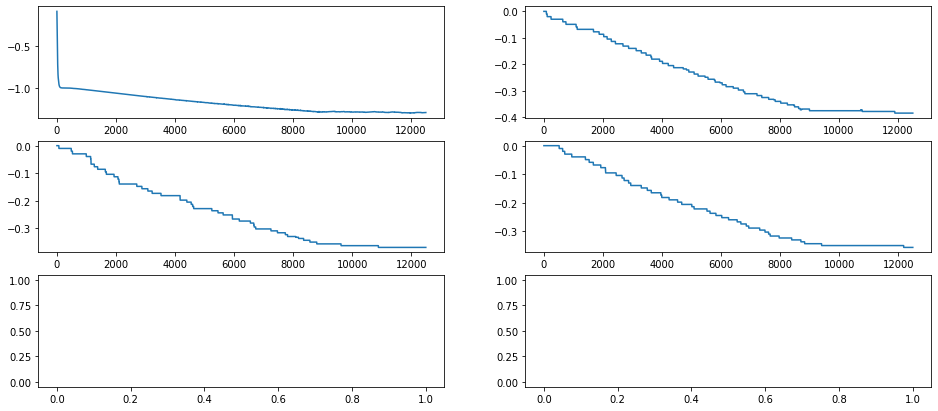

In [161]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,3)])))
plt.subplot(321)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,3)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-2-x-5-x-x-x-x'][(8,3)])))
plt.subplot(322)
plt.plot(x_axis,np.asarray(States_track['x-x-2-x-5-x-x-x-x'][(8,3)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-8-x-x-x-x-5-x-x'][(4,7)])))
plt.subplot(323)
plt.plot(x_axis,np.asarray(States_track['x-8-x-x-x-x-5-x-x'][(4,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['1-x-x-x-x-x-x-2-x'][(5,7)])))
plt.subplot(324)
plt.plot(x_axis,np.asarray(States_track['1-x-x-x-x-x-x-2-x'][(5,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-8-x-x-x-x-x-x-9'][(7,1)])))
plt.subplot(325)
plt.plot(x_axis,np.asarray(States_track['x-8-x-x-x-x-x-x-9'][(7,1)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-5-4-x-x-x-x-1'][(2,5)])))
plt.subplot(326)
plt.plot(x_axis,np.asarray(States_track['x-x-5-4-x-x-x-x-1'][(2,5)]))
plt.show

# x_axis = np.asarray(range(0, len(States_track['5-2-3-x-x-x-8-6-7'][(5,1)])))
# plt.subplot(326)
# plt.plot(x_axis,np.asarray(States_track['5-2-3-x-x-x-8-6-7'][(5,1)]))
# plt.show



### Epsilon - decay check

In [162]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,3000000)
epsilon = []
for i in range(0,3000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

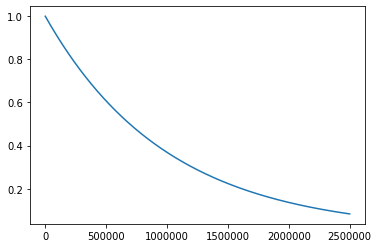

In [163]:
plt.plot(time, epsilon)
plt.show()